In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import os

In [20]:
samples = 20000
df = pd.read_csv("train2.csv")
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [22]:
df = df.loc[:samples,:]
num_classes = len(df["textID"].unique())
num_data = len(df)

In [23]:
print("Size of training data:", df.shape)
print("Number of unique classes:", num_classes)

Size of training data: (20001, 4)
Number of unique classes: 20001


In [24]:
data = pd.DataFrame(df['textID'].value_counts())
#index the data frame
data.reset_index(inplace=True) 
data.columns=['textID','count']

print(data.head(10))
print(data.tail(10))

       textID  count
0  7d52795cc2      1
1  ee421c19b6      1
2  bd1c1bb268      1
3  b396aadac2      1
4  9c43907052      1
5  b345cd08df      1
6  2586b40b4d      1
7  9dc055169b      1
8  8cac574603      1
9  f1d8fbce3c      1
           textID  count
19991  9f6406d442      1
19992  e0bd270f7d      1
19993  c4ffb519a5      1
19994  dff69b005e      1
19995  0f2cdd75bd      1
19996  58674a6d03      1
19997  33a8872ade      1
19998  c155efab1b      1
19999  74e865179b      1
20000  336cef98d2      1


count    20001.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: count, dtype: float64


Text(0, 0.5, 'Occurences')

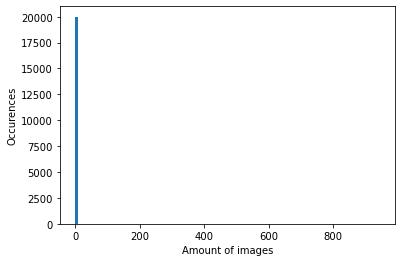

In [26]:
print(data['count'].describe())#statistical data for the distribution
plt.hist(data['count'],100,range = (0,944),label = 'testID')#Histogram of the distribution
plt.xlabel("Amount of images")
plt.ylabel("Occurences")

Amount of classes with five and less datapoints: 20001
Amount of classes with with between five and 10 datapoints: 0


Text(0, 0.5, 'Number of images')

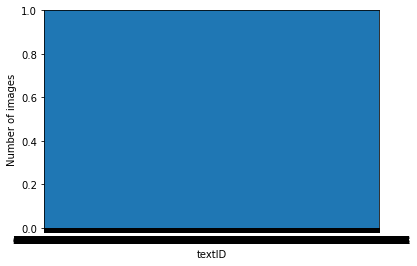

In [27]:
print("Amount of classes with five and less datapoints:", (data['count'].between(0,5)).sum()) 

print("Amount of classes with with between five and 10 datapoints:", (data['count'].between(5,10)).sum())

n = plt.hist(df["textID"],bins=df["textID"].unique())
freq_info = n[0]

plt.xlim(0,data['textID'].max())
plt.ylim(0,data['count'].max())
plt.xlabel('textID')
plt.ylabel('Number of images')